# Aufgabe 1

In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def datagen(n1, n2, m1, m2, sig1, sig2, rng: np.random.Generator):
  x1 = rng.multivariate_normal(mean=m1, cov=(sig1**2 * np.identity(2)), size=n1)
  y1 = np.ones(n1)

  x2 = rng.multivariate_normal(mean=m2, cov=(sig2**2 * np.identity(2)), size=n2)
  y2 = -np.ones(n2)

  return np.concatenate((x1, x2)), np.concatenate((y1, y2))

n1 = 50
n2 = 50
m1 = [1, 1]
m2 = [-1, -0.5]
sig1 = 2.0
sig2 = 2.0
rng = np.random.default_rng(20251101)

X, Y = datagen(n1, n2, m1, m2, sig1, sig2, rng)

X.shape


(100, 2)

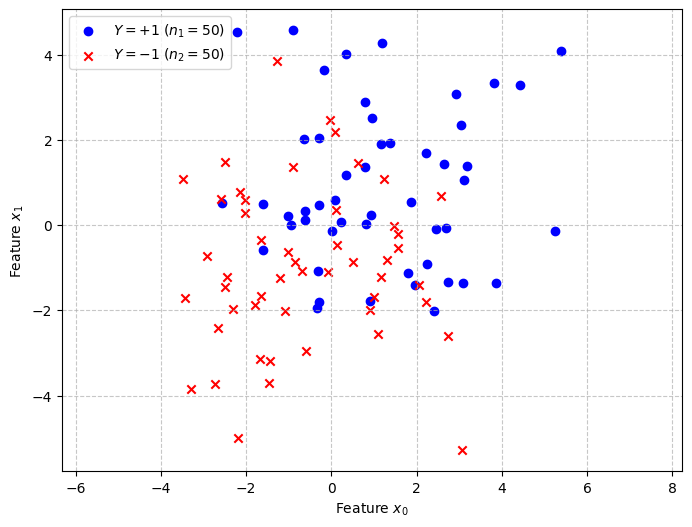

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(X[Y ==  1, 0], X[Y ==  1, 1], label=f'$Y=+1$ ($n_1={n1}$)', color='blue', marker='o')
plt.scatter(X[Y == -1, 0], X[Y == -1, 1], label=f'$Y=-1$ ($n_2={n2}$)', color='red', marker='x')
plt.xlabel('Feature $x_0$')
plt.ylabel('Feature $x_1$')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.axis('equal')
plt.show()

# Aufgabe 2

In [63]:
def binary_classify(data: np.array):
  w = np.array([2.0, 1.5])
  b = -3.0 / 8.0

  a = data @ w + b
  y_pred = np.sign(a)
  
  return y_pred

pred = binary_classify(X)
pred.shape

(100,)

In [64]:
def binary_accuracy(actual, pred):
  res = np.where(actual == pred, 1, 0)
  return res.mean()

binary_accuracy(Y, pred)

np.float64(0.72)

In [65]:
def calc_avg_accuracy_binary(runs, n):
  scores = np.zeros(runs)

  for i in range(runs):
    X, Y = datagen(n, n, m1, m2, sig1, sig2, rng)
    pred = binary_classify(X)
    scores[i] = binary_accuracy(Y, pred)

  print(f"--> runs = {runs} | n1 = n2 = {n} <--")
  print(f"Mean: {scores.mean():.4f}")
  print(f"Std:  {scores.std():.4f}\n")

calc_avg_accuracy_binary(100, 10)
calc_avg_accuracy_binary(100, 50)
calc_avg_accuracy_binary(100, 100)
calc_avg_accuracy_binary(100, 1000)
calc_avg_accuracy_binary(100, 10000)

--> runs = 100 | n1 = n2 = 10 <--
Mean: 0.7375
Std:  0.0996

--> runs = 100 | n1 = n2 = 50 <--
Mean: 0.7287
Std:  0.0428

--> runs = 100 | n1 = n2 = 100 <--
Mean: 0.7349
Std:  0.0305

--> runs = 100 | n1 = n2 = 1000 <--
Mean: 0.7335
Std:  0.0097

--> runs = 100 | n1 = n2 = 10000 <--
Mean: 0.7339
Std:  0.0029



# Aufgabe 3

siehe Übung 2

# Aufgabe 4

In [ ]:
def one_nn_classify(train_X, train_Y, x):
  # ||X-Y||^2 = ||X||^2 + ||Y||^2 - 2X^TY
  # ||X-Y||^2 = sum(X^2) + sum(Y^2) - 2XY
  # distances = np.sqrt(np.sum(train_X**2, axis=1) + np.sum(x**2) - 2 * train_X @ x)

  distances = np.linalg.norm(train_X - x, axis=1)
  pred = train_Y[np.argmin(distances)]
  return pred

X, Y = datagen(n1, n2, m1, m2, sig1, sig2, rng)
one_nn_classify(X, Y, X[1])

np.float64(1.0)

In [67]:
n = 100
train_X, train_Y = datagen(n, n, m1, m2, sig1, sig2, rng)
test_X, test_Y = datagen(n, n, m1, m2, sig1, sig2, rng)

test_pred = [one_nn_classify(train_X, train_Y, x) for x in test_X]

binary_accuracy(test_Y, test_pred)

np.float64(0.69)

In [68]:
def calc_avg_accuracy_one_nn(runs, n):
  scores = np.zeros(runs)

  for i in range(runs):
    train_X, train_Y = datagen(n, n, m1, m2, sig1, sig2, rng)
    test_X, test_Y = datagen(n, n, m1, m2, sig1, sig2, rng)

    test_pred = [one_nn_classify(train_X, train_Y, x) for x in test_X]

    scores[i] = binary_accuracy(test_Y, test_pred)

  print(f"--> runs = {runs} | n1 = n2 = {n} <--")
  print(f"Mean: {scores.mean():.4f}")
  print(f"Std:  {scores.std():.4f}\n")

calc_avg_accuracy_one_nn(5, 100)
calc_avg_accuracy_one_nn(10, 100)
calc_avg_accuracy_one_nn(100, 100)


--> runs = 5 | n1 = n2 = 100 <--
Mean: 0.6280
Std:  0.0385

--> runs = 10 | n1 = n2 = 100 <--
Mean: 0.6265
Std:  0.0359

--> runs = 100 | n1 = n2 = 100 <--
Mean: 0.6476
Std:  0.0366

